In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mplfinance.original_flavor import candlestick_ohlc
from bokeh.plotting import figure, show, output_file
from nsepy import get_history
from datetime import date
from math import pi

In [189]:
data = get_history(symbol="TCS", start=date(2020,1,1), end=date(2021,1,18)) 
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-12,TCS,EQ,3176.45,3176.45,3210.00,3150.00,3172.00,3174.85,3187.07,3611458,1.150997e+15,142696,1656842,0.4588
2021-01-13,TCS,EQ,3174.85,3175.00,3177.00,3126.25,3158.00,3158.95,3147.46,3572801,1.124526e+15,189690,1857249,0.5198
2021-01-14,TCS,EQ,3158.95,3155.00,3266.50,3120.40,3244.35,3250.70,3207.17,6931542,2.223061e+15,276953,3067056,0.4425
2021-01-15,TCS,EQ,3250.70,3235.00,3274.00,3210.00,3229.95,3233.35,3240.98,4131692,1.339073e+15,193972,1959292,0.4742
2021-01-18,TCS,EQ,3233.35,3250.00,3256.75,3187.40,3215.00,3221.75,3230.06,4160906,1.343999e+15,195067,2204487,0.5298


In [190]:
data = data[['Open','High','Low', 'Last', 'Close', 'Volume']]
data 

,Open,High,Low,Last,Close,Volume
Date,,,,,,
2020-01-01,2168.00,2183.90,2154.00,2170.00,2167.60,1354908
2020-01-02,2179.95,2179.95,2149.20,2157.00,2157.65,2380752
2020-01-03,2164.00,2223.00,2164.00,2201.00,2200.65,4655761
2020-01-06,2205.00,2225.95,2187.90,2201.35,2200.45,3023209
2020-01-07,2200.50,2214.65,2183.80,2205.00,2205.85,2429317
...,...,...,...,...,...,...
2021-01-12,3176.45,3210.00,3150.00,3172.00,3174.85,3611458
2021-01-13,3175.00,3177.00,3126.25,3158.00,3158.95,3572801
2021-01-14,3155.00,3266.50,3120.40,3244.35,3250.70,6931542


In [191]:
data['High-Low'] = data.High- data.Low
data['Open-Close'] = data.Open-data.Close

In [192]:
X = data[['High-Low', 'Open-Close']]
X.head()

,High-Low,Open-Close
Date,,
2020-01-01,29.90,0.40
2020-01-02,30.75,22.30
2020-01-03,59.00,-36.65
2020-01-06,38.05,4.55
2020-01-07,30.85,-5.35


In [193]:
y= np.where(data['Close'].shift(-1)> data['Close'], 1,0)

In [194]:
split_percentage = 0.8
Split = int(split_percentage*len(data))

X_train = X[:Split]
y_train = y[:Split]

X_test = X[Split:]
y_test = y[Split:]

In [195]:
model = SVC()
cls = model.fit(X_train, y_train)

In [196]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

In [197]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 55.45%
Test Accuracy: 58.49%


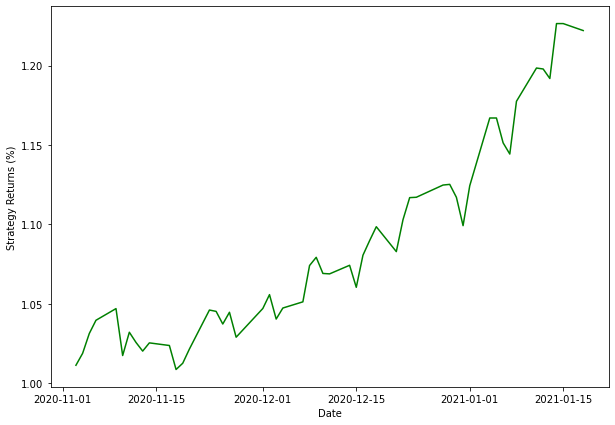

In [198]:
# Predicted Signal
data['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
data['Return'] = data.Close.pct_change()

# Calculate strategy returns
data['Strategy_Return'] = data.Return * data.Predicted_Signal.shift(1)

# Calculate geometric returns
geometric_returns = (data.Strategy_Return.iloc[Split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

In [199]:
data.tail()

,Open,High,Low,Last,Close,Volume,High-Low,Open-Close,Predicted_Signal,Return,Strategy_Return
Date,,,,,,,,,,,
2021-01-12,3176.45,3210.00,3150.00,3172.00,3174.85,3611458,60.00,1.60,1,-0.000504,-0.000504
2021-01-13,3175.00,3177.00,3126.25,3158.00,3158.95,3572801,50.75,16.05,1,-0.005008,-0.005008
2021-01-14,3155.00,3266.50,3120.40,3244.35,3250.70,6931542,146.10,-95.70,0,0.029044,0.029044
2021-01-15,3235.00,3274.00,3210.00,3229.95,3233.35,4131692,64.00,1.65,1,-0.005337,-0.000000
2021-01-18,3250.00,3256.75,3187.40,3215.00,3221.75,4160906,69.35,28.25,1,-0.003588,-0.003588
